## Importing Libraries 

In [1]:
import pandas as pd 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np 
from sklearn.model_selection import GridSearchCV

## Load Dataset 

In [2]:
data = load_breast_cancer()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df["Target"] = data.target
X,y = df.drop("Target", axis=1), df.Target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## 🧑‍💻 Scenario 1: Original Features (Baseline)
We'll start with the original dataset containing all features, and we'll perform hyperparameter tuning using Logistic Regression.

### Hyperparameter grid for Logistic Regression

In [8]:
param_grid = {'C': [0.01, 0.1,1,10,100], # Regularization parameters 
              'solver': ["liblinear", "saga"] # Optimization algorithm
              }

In [9]:
logistic_reg_model = LogisticRegression(max_iter=10000)
grid_search_model = GridSearchCV(logistic_reg_model, param_grid, cv=5)
grid_search_model.fit(X_train_scaled, y_train)
y_pred = grid_search_model.predict(X_test_scaled)

In [10]:
# Best hyperparameters and evaluation
print("Best Hyperparameters (Original Features):", grid_search_model.best_params_)
y_pred = grid_search_model.predict(X_test_scaled)
print("Accuracy (Original Features):", accuracy_score(y_test, y_pred))

Best Hyperparameters (Original Features): {'C': 0.1, 'solver': 'liblinear'}
Accuracy (Original Features): 0.9824561403508771


### Explanation:
**Feature Set:** All original features are used.

**Hyperparameter Tuning:** We use GridSearchCV to tune the regularization parameter C and the solver for the Logistic Regression model.

The result is the best combination of hyperparameters that minimize overfitting or underfitting.

**Effect of Features:** As the feature set is relatively manageable in this case, regularization (C) is tuned to prevent overfitting. The number of features is not very large here.

## 🧑‍💻 Scenario 2: Adding Noisy Features
Now, we'll add some noisy features to the dataset. Noisy features increase the model's complexity, and proper regularization becomes even more critical.

In [11]:
X_noisy = np.hstack((X, np.random.randn(X.shape[0], 500)))
X.shape, X_noisy.shape

((569, 30), (569, 530))

In [12]:
pd.DataFrame(X).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
pd.DataFrame(X_noisy).head()

,0,1,2,3,4,5,6,7,8,9,...,520,521,522,523,524,525,526,527,528,529
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,1.050790,1.196771,-1.059960,-1.188404,1.676084,0.484149,0.310237,0.399005,0.478778,0.674349
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,-0.093499,0.132281,1.595714,-0.233072,0.612621,0.128230,-1.988114,-0.806275,-1.140839,0.590052
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,-0.779430,0.754466,0.175733,-0.677633,0.392817,-0.519930,0.091115,0.327797,-0.824978,2.123615
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,1.530271,-0.314345,-2.393154,0.216495,0.582105,0.124333,0.924043,-1.544489,0.542818,-1.284647
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.796056,0.511036,-2.224070,-1.075111,-0.065608,1.113253,0.640839,-0.187961,0.688818,-0.903372


In [14]:
X_train_noisy, X_test_noisy, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

In [15]:
X_train_noisy_scaled = scaler.fit_transform(X_train_noisy)
X_test_noisy_scaled = scaler.fit_transform(X_test_noisy)

In [16]:
param_grid

{'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'saga']}

In [17]:
grid_search_noisy_model = GridSearchCV(logistic_reg_model, param_grid, cv=5)
grid_search_noisy_model.fit(X_train_noisy_scaled, y_train)
# grid_search_noisy_model.fit(X_train_noisy_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']})

In [18]:
# Best hyperparameters and evaluation with noisy features
print("Best Hyperparameters (Noisy Features):", grid_search_noisy_model.best_params_)
y_pred_noisy = grid_search_noisy_model.predict(X_test_noisy_scaled)
print("Accuracy (Noisy Features):", accuracy_score(y_test, y_pred_noisy))

Best Hyperparameters (Noisy Features): {'C': 0.01, 'solver': 'liblinear'}
Accuracy (Noisy Features): 0.9883040935672515


Explanation:
Feature Set: 50 noisy features are added to the original dataset.

Impact on Hyperparameter Tuning: With noisy features, the model has more dimensions to deal with, which can lead to overfitting if regularization is not properly tuned. The regularization parameter C will be important to prevent this overfitting.

Effect of Noisy Features: As the feature space increases with noise, the model becomes more complex, and we may need stronger regularization to maintain a balance between fitting the data and avoiding overfitting.



## 🧑‍💻 Scenario 3: PCA-Reduced Features (Dimensionality Reduction)
To reduce the number of features, we can use Principal Component Analysis (PCA). This technique reduces the dimensionality of the data while retaining most of the variance in the data.

In [19]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions (let's say to 10 components)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_noisy)

# Train-test split with PCA-reduced features
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Standardizing the PCA data
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

# Hyperparameter tuning with PCA-reduced features
grid_search_pca = GridSearchCV(logistic_reg_model, param_grid, cv=5)
grid_search_pca.fit(X_train_pca_scaled, y_train)

# Best hyperparameters and evaluation with PCA
print("Best Hyperparameters (PCA):", grid_search_pca.best_params_)
y_pred_pca = grid_search_pca.predict(X_test_pca_scaled)
print("Accuracy (PCA Features):", accuracy_score(y_test, y_pred_pca))


Best Hyperparameters (PCA): {'C': 10, 'solver': 'liblinear'}
Accuracy (PCA Features): 0.9649122807017544


Explanation:
Feature Set: The dataset is reduced to 10 principal components using PCA, which removes noise and reduces the dimensionality.

Impact on Hyperparameter Tuning: With fewer features, the model has less complexity, and the tuning of regularization (C) becomes simpler. The model is less likely to overfit, and cross-validation is more stable.

Effect of PCA: PCA helps to focus on the most significant features, thus reducing the impact of irrelevant dimensions. This makes the hyperparameter tuning process more effective, as fewer features typically result in a less complex model with lower risk of overfitting.

Summary of Key Points
Original Features: Regularization (C) is tuned to avoid overfitting as we try to balance model complexity and performance.

Noisy Features: The additional features add complexity, increasing the risk of overfitting. Regularization becomes more important to prevent the model from fitting noise rather than patterns in the data.

PCA-Reduced Features: By reducing the number of features, we simplify the model, making it easier to tune hyperparameters like regularization. PCA helps the model to generalize better and reduces overfitting.

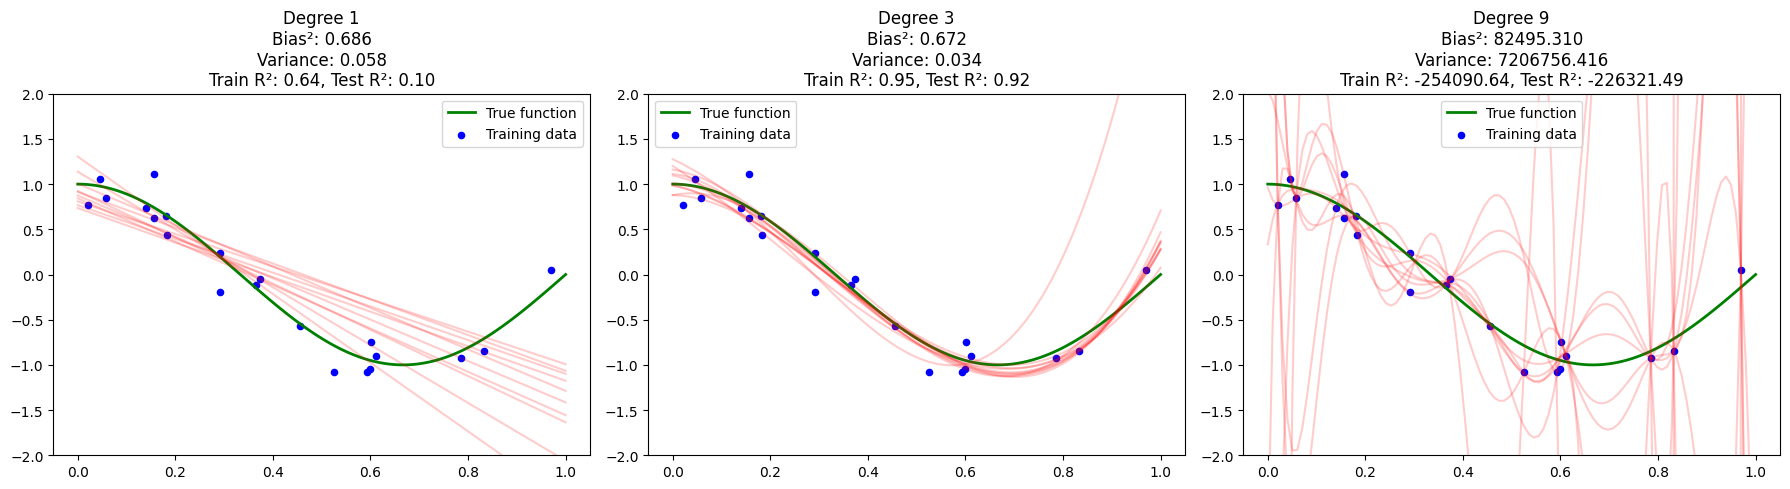


Model Performance Metrics:
Degree     Bias²      Variance   Total Error Train R²        Test R²        
1          0.686      0.058      0.744      0.643           0.104          
3          0.672      0.034      0.706      0.947           0.919          
9          82495.310  7206756.416 7289251.726 -254090.638     -226321.492    


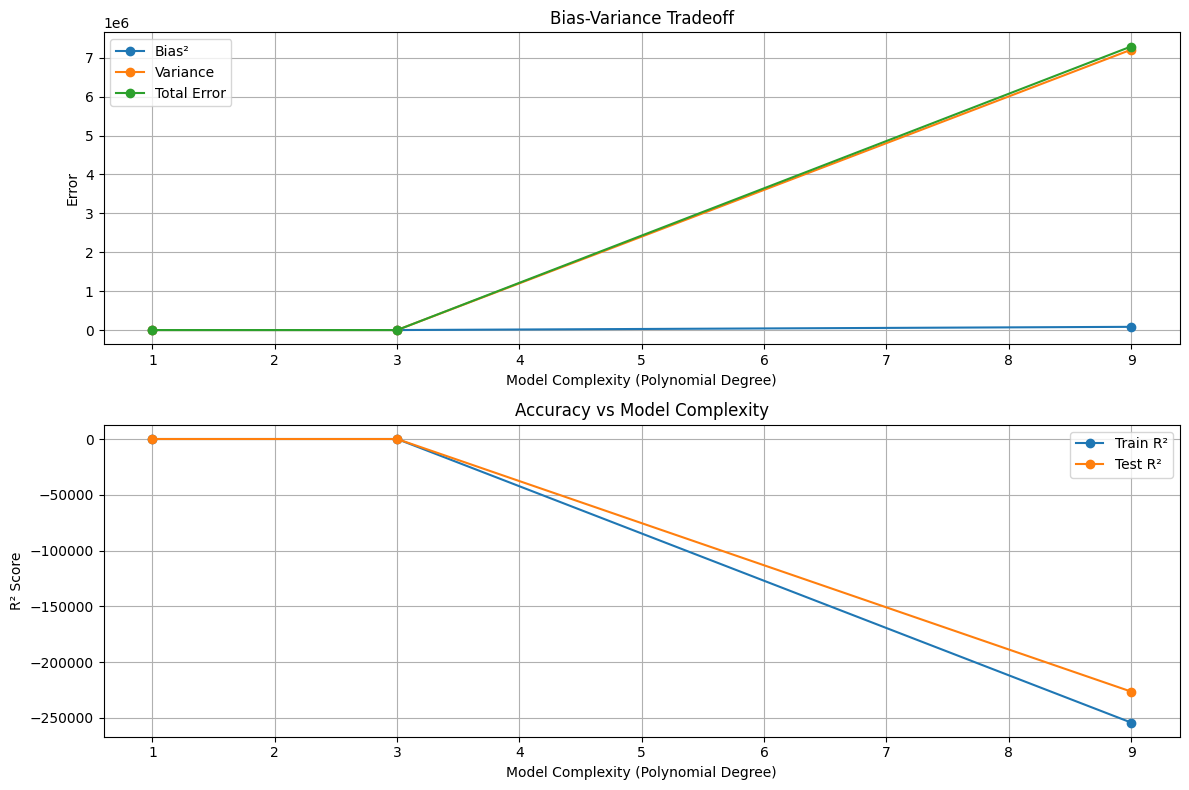

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

## 1. Create synthetic dataset
def true_function(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.2  # Add noise
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 2. Enhanced function to calculate metrics
def calculate_model_metrics(model, X_train, y_train, X_test, y_true, n_iterations=100):
    """
    Calculate bias, variance, and accuracy metrics
    """
    train_preds = []
    test_preds = np.zeros((n_iterations, len(X_test)))
    
    for i in range(n_iterations):
        # Resample training data
        idx = np.random.choice(len(X_train), len(X_train), replace=True)
        X_resampled = X_train[idx]
        y_resampled = y_train[idx]
        
        # Fit model
        model.fit(X_resampled, y_resampled)
        
        # Store predictions
        train_preds.append(model.predict(X_train))
        test_preds[i] = model.predict(X_test)
    
    # Calculate metrics
    mean_test_pred = np.mean(test_preds, axis=0)
    bias_squared = np.mean((y_true - mean_test_pred) ** 2)
    variance = np.mean(np.var(test_preds, axis=0))
    
    # Calculate accuracy metrics
    train_r2 = r2_score(y_train, np.mean(train_preds, axis=0))
    test_r2 = r2_score(y_test, mean_test_pred)
    
    return {
        'bias_squared': bias_squared,
        'variance': variance,
        'total_error': bias_squared + variance,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

## 3. Evaluate models with different complexities
degrees = [1, 3, 9]
results = []

plt.figure(figsize=(18, 5))
for i, degree in enumerate(degrees):
    # Create model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Calculate metrics
    metrics = calculate_model_metrics(model, X_train, y_train, X_test, true_function(X_test))
    results.append({'degree': degree, **metrics})
    
    # Plot model fits
    plt.subplot(1, 3, i+1)
    
    # Plot true function
    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, true_function(X_plot), label="True function", color='green', linewidth=2)
    
    # Plot 10 different fits
    for _ in range(10):
        idx = np.random.choice(len(X_train), len(X_train), replace=True)
        model.fit(X_train[idx], y_train[idx])
        y_plot = model.predict(X_plot.reshape(-1, 1))
        plt.plot(X_plot, y_plot, color='red', alpha=0.2)
    
    # Plot data points
    plt.scatter(X_train, y_train, color='blue', s=20, label="Training data")
    
    # Add metrics to title
    title = f"Degree {degree}\n"
    title += f"Bias²: {metrics['bias_squared']:.3f}\n"
    title += f"Variance: {metrics['variance']:.3f}\n"
    title += f"Train R²: {metrics['train_r2']:.2f}, Test R²: {metrics['test_r2']:.2f}"
    plt.title(title)
    plt.ylim(-2, 2)
    plt.legend()

plt.tight_layout()
plt.show()

## 4. Print detailed metrics table
print("\nModel Performance Metrics:")
print("{:<10} {:<10} {:<10} {:<10} {:<15} {:<15}".format(
    "Degree", "Bias²", "Variance", "Total Error", "Train R²", "Test R²"))
for r in results:
    print("{:<10} {:<10.3f} {:<10.3f} {:<10.3f} {:<15.3f} {:<15.3f}".format(
        r['degree'], r['bias_squared'], r['variance'], r['total_error'],
        r['train_r2'], r['test_r2']))

## 5. Plot bias-variance-accuracy tradeoff
plt.figure(figsize=(12, 8))

# First subplot: Error components
plt.subplot(2, 1, 1)
degrees = [r['degree'] for r in results]
plt.plot(degrees, [r['bias_squared'] for r in results], 'o-', label='Bias²')
plt.plot(degrees, [r['variance'] for r in results], 'o-', label='Variance')
plt.plot(degrees, [r['total_error'] for r in results], 'o-', label='Total Error')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.title('Bias-Variance Tradeoff')
plt.legend()
plt.grid()

# Second subplot: Accuracy metrics
plt.subplot(2, 1, 2)
plt.plot(degrees, [r['train_r2'] for r in results], 'o-', label='Train R²')
plt.plot(degrees, [r['test_r2'] for r in results], 'o-', label='Test R²')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('R² Score')
plt.title('Accuracy vs Model Complexity')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()